<a href="https://colab.research.google.com/github/divsal009/div/blob/master/ANNRegression%26EDA_HealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')

In [4]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Data manipulation**

In [6]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Label Encoder**

In [9]:
from sklearn.preprocessing import LabelEncoder
# sex {'male' - 1, 'female' - 0}
le = LabelEncoder()
# Training the Label encoder with Transformations 
le.fit(insurance_data['sex'].drop_duplicates())
# make transormations in entire sex column
insurance_data['sex'] = le.transform(insurance_data['sex'])



In [10]:
le.fit(insurance_data['smoker'].drop_duplicates())
# make transormations in entire sex smoker
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [11]:
le.fit(insurance_data['region'].drop_duplicates())
# make transormations in entire sex smoker
insurance_data['region'] = le.transform(insurance_data['region'])

In [12]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**EDA**

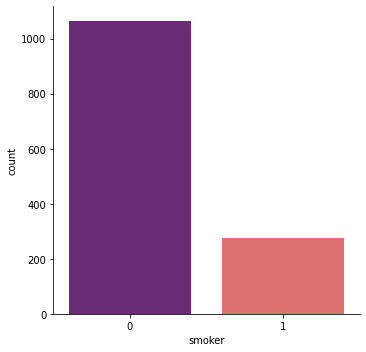

In [15]:
sns.catplot(x = 'smoker', kind = 'count', data = insurance_data, palette='magma')

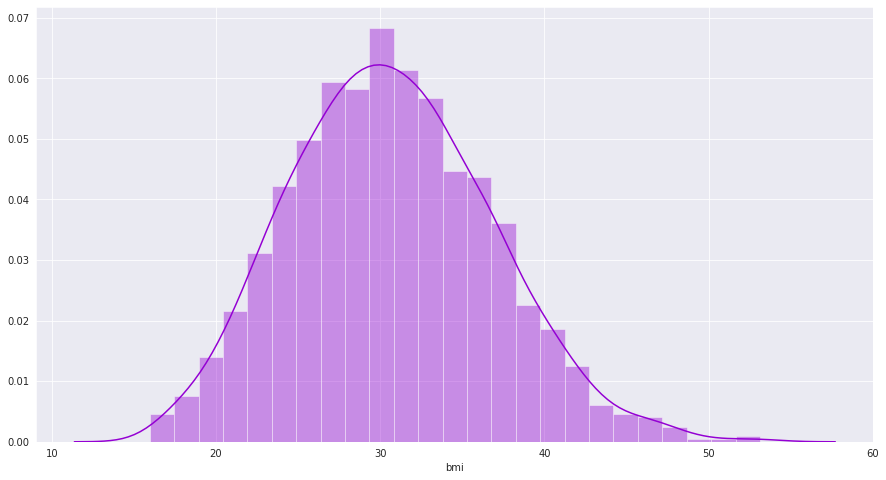

In [16]:
# BMI is normally distributed data (overall)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(insurance_data['bmi'], color = 'darkviolet')

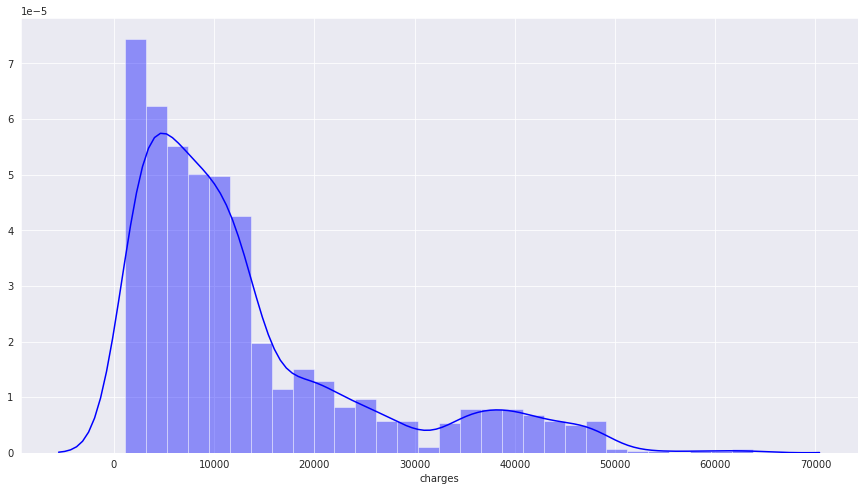

In [17]:
# Charges of Insurance is skewed
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(insurance_data['charges'], color = 'blue')

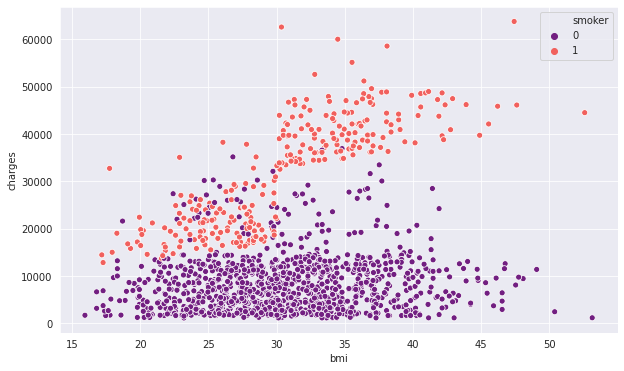

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance_data, hue = 'smoker', palette='magma')

In [19]:
insurance_data['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [23]:
insurance_data[(insurance_data['smoker']==1)]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
11,62,0,26.290,0,1,2,27808.72510
14,27,1,42.130,0,1,2,39611.75770
19,30,1,35.300,0,1,3,36837.46700
23,34,0,31.920,1,1,0,37701.87680
...,...,...,...,...,...,...,...
1313,19,0,34.700,2,1,3,36397.57600
1314,30,0,23.655,3,1,1,18765.87545
1321,62,1,26.695,0,1,0,28101.33305
1323,42,0,40.370,2,1,2,43896.37630


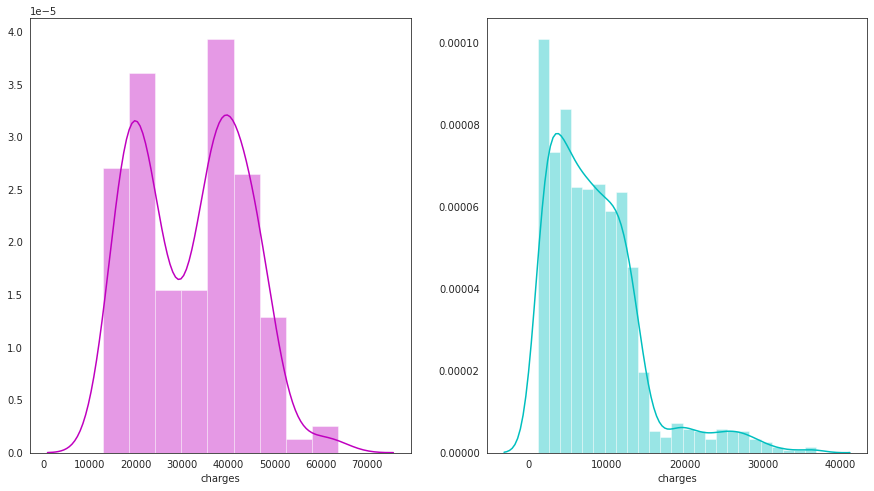

In [27]:
# Subplotting Distribution of Smoker vs Non-Smokers for Medical Health Charges
sns.set_style('white')
fig = plt.figure(figsize=(15,8))
# 1, 2, 1 = 1=row, 2 columns & 1st Plot
ax = fig.add_subplot(1, 2, 1)
sns.distplot(insurance_data[(insurance_data['smoker'] == 1)]['charges'], ax = ax, color = 'm')
# 1, 2, 2 = 1=row, 2 columns & 2nd Plot
ax = fig.add_subplot(1, 2, 2)
sns.distplot(insurance_data[(insurance_data['smoker'] == 0)]['charges'], ax = ax, color = 'c')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Correlation

                        **Feature** selection

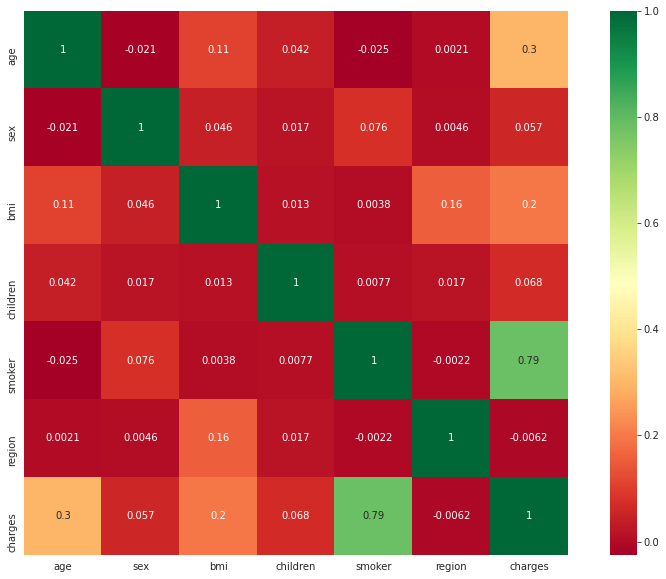

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(insurance_data.corr(), annot=True, cmap = 'RdYlGn', square=True)



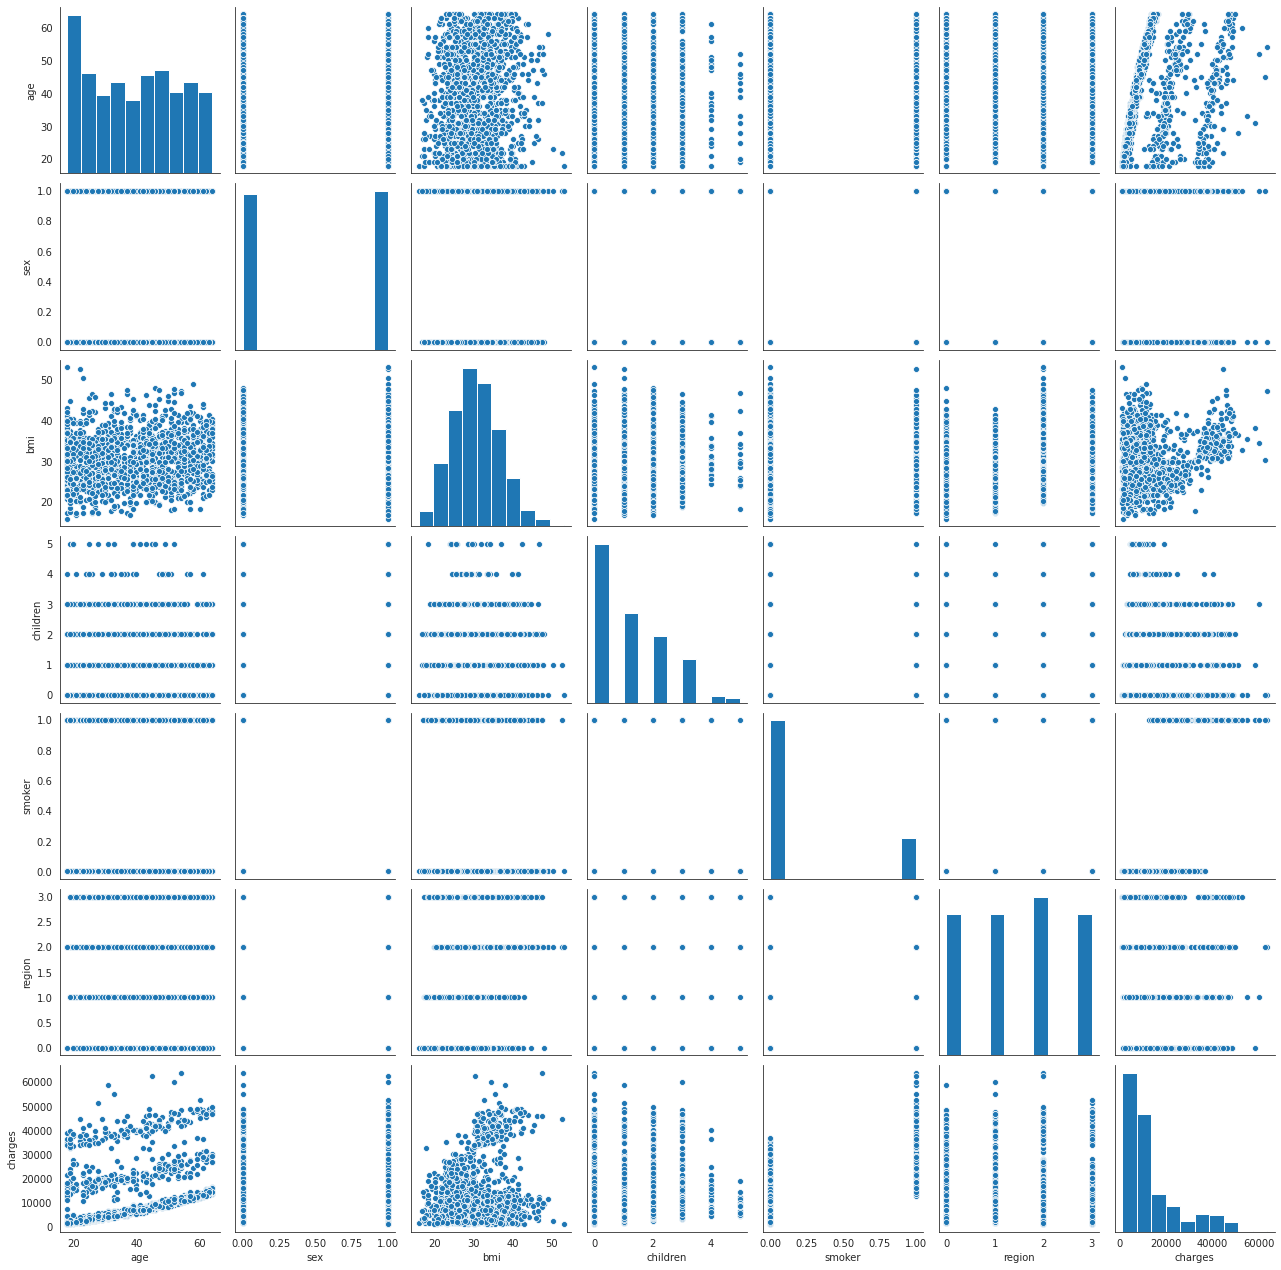

In [29]:
sns.pairplot(insurance_data)


In [32]:
X = insurance_data.iloc[:,:-1]


In [35]:
Y = insurance_data['charges']

# **cross validation**

In [45]:
from sklearn.model_selection import train_test_split
# random_state = 0, fix the random_state to fix the random selection of train & test splits 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [46]:
import keras
from keras.layers import Dense
from keras import Sequential

In [56]:
def build_model():
  model = Sequential()
  # Input Layer 
  model.add(Dense(units = 128, activation='relu', input_shape = [len(X.keys())]))
  # hidden Layer - I
  model.add(Dense(units = 256, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 512, activation='relu'))
  # Output Layer
  model.add(Dense(1))
  # learning rate = 0.00001-0.5
  optimizers = keras.optimizers.RMSprop(learning_rate=0.001)

  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                'mean_absolute_error'])
  
  return model

In [57]:
model = build_model()
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Epochs : Iterations with random train data samples by suffling 
# Batch Size : small size of samples used for training the algorithm until entire training data finishes will be equals to 1 epoch 
# Validation : During the training of algorithm (ANN) validating is important to avoid overitting, It testing model at each epoch 
history = model.fit(X_train, Y_train, epochs = 500, batch_size=30 , validation_split = 0.20)

Train on 856 samples, validate on 214 samples
Epoch 1/500
856/856 [==============================] - 0s 226us/step - loss: 273695350.3738 - mean_squared_error: 273695360.0000 - mean_absolute_error: 11673.2012 - val_loss: 260387576.9112 - val_mean_squared_error: 260387568.0000 - val_mean_absolute_error: 10541.8252
Epoch 2/500
856/856 [==============================] - 0s 129us/step - loss: 151158429.6636 - mean_squared_error: 151158432.0000 - mean_absolute_error: 7939.3472 - val_loss: 147595216.4486 - val_mean_squared_error: 147595200.0000 - val_mean_absolute_error: 9173.1240
Epoch 3/500
856/856 [==============================] - 0s 129us/step - loss: 125585459.9252 - mean_squared_error: 125585464.0000 - mean_absolute_error: 8698.0303 - val_loss: 144138128.7850 - val_mean_squared_error: 144138128.0000 - val_mean_absolute_error: 9460.6719
Epoch 4/500
856/856 [==============================] - 0s 133us/step - loss: 125235238.7103 - mean_squared_error: 125235240.0000 - mean_absolute_error:

In [60]:
pd.DataFrame(history.history)

,val_loss,val_mean_squared_error,val_mean_absolute_error,loss,mean_squared_error,mean_absolute_error
0,2.603876e+08,260387568.0,10541.825195,2.736954e+08,273695360.0,11673.201172
1,1.475952e+08,147595200.0,9173.124023,1.511584e+08,151158432.0,7939.347168
2,1.441381e+08,144138128.0,9460.671875,1.255855e+08,125585464.0,8698.030273
3,1.450323e+08,145032320.0,9306.000000,1.252352e+08,125235240.0,8788.365234
4,1.478497e+08,147849664.0,9035.362305,1.243103e+08,124310336.0,8815.323242
...,...,...,...,...,...,...
495,3.913879e+07,39138788.0,3315.545898,1.964840e+07,19648404.0,2652.665283
496,3.769063e+07,37690632.0,4970.657227,1.946559e+07,19465588.0,2520.385498
497,3.515650e+07,35156508.0,4084.116455,2.015992e+07,20159914.0,2701.950928
498,4.075768e+07,40757684.0,3181.601807,1.983416e+07,19834158.0,2663.666748


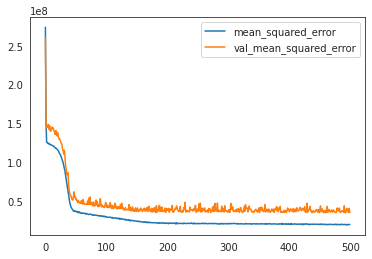

In [61]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()


In [63]:
predictions=model.predict(X_test)

## **Accuracy**

In [ ]:
#Rsquared

In [64]:
from sklearn.metrics import r2_score
predictions = model.predict(X_test)
r2_score(Y_test, predictions)


0.8739614582578543